In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [ ]:
#   File Beer reviews.csv
#   --------------------------------------

# This file contains 1 Tabs  with Beer dateset detailled profile and ratings info
    #   Name	Style	Brewery	Beer Name (Full)	Description	ABV	Min IBU	Max IBU	Astringency	Body	Alcohol	Bitter	Sweet	Sour	Salty	Fruits	Hoppy	Spices	Malty	review_aroma	review_appearance	review_palate	review_taste	review_overall	number_of_reviews



In [3]:
# Fetch raw data

rawdata = pd.read_csv(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\beer_reviews.csv') 
 

In [4]:
#rawdata.info()
str = rawdata.info()
structure = pd.DataFrame(str)  #  ne met pas en dataframe
structure
# structure.to_excel("Beer_datasets_structures",sheet_name='Beer data set details') # n ecrit pas le rawdata.info dans le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


""


In [7]:
rawdata.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


TIME SERIES with reviews

Demarche
-------------

Verifier si Id et nom est consistent - semble être le cas (pour brewery et beer name)
On a de quoi faire des dimensions et time serie
Voir à quelles questions on veut repondre
Note : review time est un format date unix à transformer

In [4]:
#   Split dataset

cont_float_feature=rawdata.select_dtypes(float)
cont_int_features=rawdata.select_dtypes(int)
cat_feature= rawdata.select_dtypes(object)
cat_feature


,brewery_name,review_profilename,beer_style,beer_name
0,Vecchio Birraio,stcules,Hefeweizen,Sausa Weizen
1,Vecchio Birraio,stcules,English Strong Ale,Red Moon
2,Vecchio Birraio,stcules,Foreign / Export Stout,Black Horse Black Beer
3,Vecchio Birraio,stcules,German Pilsener,Sausa Pils
4,Caldera Brewing Company,johnmichaelsen,American Double / Imperial IPA,Cauldron DIPA
...,...,...,...,...
1586609,The Defiant Brewing Company,maddogruss,Pumpkin Ale,The Horseman's Ale
1586610,The Defiant Brewing Company,yelterdow,Pumpkin Ale,The Horseman's Ale
1586611,The Defiant Brewing Company,TongoRad,Pumpkin Ale,The Horseman's Ale
1586612,The Defiant Brewing Company,dherling,Pumpkin Ale,The Horseman's Ale


In [7]:
for col in cat_feature.columns:
    display(col)
    print('----------------')
    display(cat_feature[col].unique())
    display(cat_feature[col].value_counts())



'brewery_name'

----------------


array(['Vecchio Birraio', 'Caldera Brewing Company',
       'Amstel Brouwerij B. V.', ..., 'Wissey Valley Brewery',
       'Outback Brewery Pty Ltd', 'Georg Meinel Bierbrauerei KG'],
      dtype=object)

brewery_name
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Brasserie Du Corsaire                     1
Willoughby Brewing Company                1
Factory Beer                              1
Denen Plaza Kawaba Brewery                1
Iceberg Corp. Of America                  1
Name: count, Length: 5742, dtype: int64

'review_profilename'

----------------


array(['stcules', 'johnmichaelsen', 'oline73', ..., 'hogshead',
       'NyackNicky', 'joeebbs'], dtype=object)

review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
                  ... 
Icebird757           1
postroad             1
brendanspub          1
Hobbitjedi           1
Gitguy               1
Name: count, Length: 33387, dtype: int64

'beer_style'

----------------


array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: count, Length: 104, dtype: int64

'beer_name'

----------------


array(['Sausa Weizen', 'Red Moon', 'Black Horse Black Beer', ...,
       'Baron Von Weizen', 'Resolution #2', "The Horseman's Ale"],
      dtype=object)

beer_name
90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
                                       ... 
Ruddy Glow                                1
Old Oakland Ale                           1
Yellowjacket Ale                          1
Megalodon                                 1
Alpha Beta                                1
Name: count, Length: 56857, dtype: int64

Outcome of unique and value counts
-----------------------------------
Full name and description - leaf level
Analysis possible per name (label), style, brewery
Some bears / style/ breweries .... evaluated a lot, other very few = big name
Set of evaluators providing a lot of evaluation - some very few - to e seen if outliers eval in the 'few' categories


In [8]:
cont_float_feature.info()
cont_int_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_overall     1586614 non-null  float64
 1   review_aroma       1586614 non-null  float64
 2   review_appearance  1586614 non-null  float64
 3   review_palate      1586614 non-null  float64
 4   review_taste       1586614 non-null  float64
 5   beer_abv           1518829 non-null  float64
dtypes: float64(6)
memory usage: 72.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   brewery_id   1586614 non-null  int64
 1   review_time  1586614 non-null  int64
 2   beer_beerid  1586614 non-null  int64
dtypes: int64(3)
memory usage: 36.3 MB


In [5]:
cont_float_feature

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7
...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2
1586610,4.0,5.0,2.5,2.0,4.0,5.2
1586611,4.5,3.5,3.0,3.5,4.0,5.2
1586612,4.0,4.5,4.5,4.5,4.5,5.2


Outcome of float
    Review columns > detailed ratings = to be seen if profile ratings is average, median value of detailed ratings
    Detailed rating evolve over time
    Are profile ratings a picture at a certain moment


In [10]:
cont_int_features

,brewery_id,review_time,beer_beerid
0,10325,1234817823,47986
1,10325,1235915097,48213
2,10325,1235916604,48215
3,10325,1234725145,47969
4,1075,1293735206,64883
...,...,...,...
1586609,14359,1162684892,33061
1586610,14359,1161048566,33061
1586611,14359,1160702513,33061
1586612,14359,1160023044,33061


Integer
- beer id, brewery id - no aggrgation
- time to be transformed in date


In [11]:
#   GRAPHS
#   -------------


In [6]:
FIGSIZE = (6,7)    # Taille figure en pouce - utlise dans tous les graphes
FIGSIZE2 = (3,4)

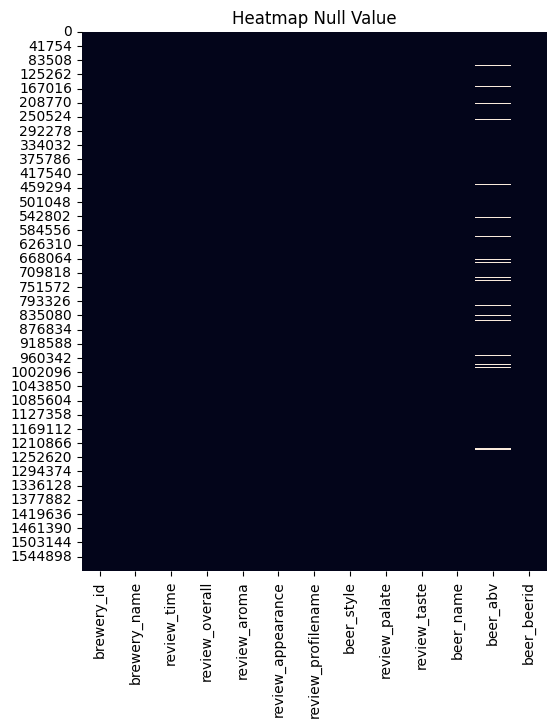

In [13]:
#   Repérer s'il y a des NULL et leur distribution / localisation
#   ---------------------------------------------------------------
plt.figure(figsize=FIGSIZE)         # Fonction figure > declarer figure dans laquelle je vais travailler
plt.title('Heatmap Null Value')     #   Titre de la figure
sns.heatmap(rawdata.isna(),cbar=False)      # Utilise graphique heatmap de seaborn dans matlpotlib / 
                                            #   isna nous dnne un masque boleen
plt.show()

Few NULL / missing values in beer_abv - can be retrieved in beer profile and ratings

In [ ]:
#   Analyser continuous features - integers ID and Time == Not relevant 
#   ==========================================

# X_continuous = rawdata[['Body','Bitter','Alcohol']] 

for i, col in enumerate(cont_int_features):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 

Not relevant hre -id and time fields

In [ ]:
#   Graphes sur variables catégorielles > distribution
#   -----------------------------------------------------

X_discrete = rawdata[['beer_style','brewery_name']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 



Some breweries and beer styles evaluated more the others  this graph is not readable as too many items

In [7]:
cont_float_feature

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,1.5,2.0,2.5,1.5,1.5,5.0
1,3.0,2.5,3.0,3.0,3.0,6.2
2,3.0,2.5,3.0,3.0,3.0,6.5
3,3.0,3.0,3.5,2.5,3.0,5.0
4,4.0,4.5,4.0,4.0,4.5,7.7
...,...,...,...,...,...,...
1586609,5.0,4.0,3.5,4.0,4.0,5.2
1586610,4.0,5.0,2.5,2.0,4.0,5.2
1586611,4.5,3.5,3.0,3.5,4.0,5.2
1586612,4.0,4.5,4.5,4.5,4.5,5.2


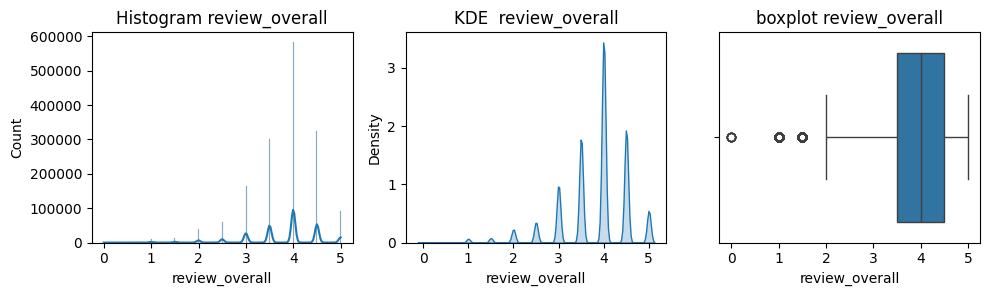

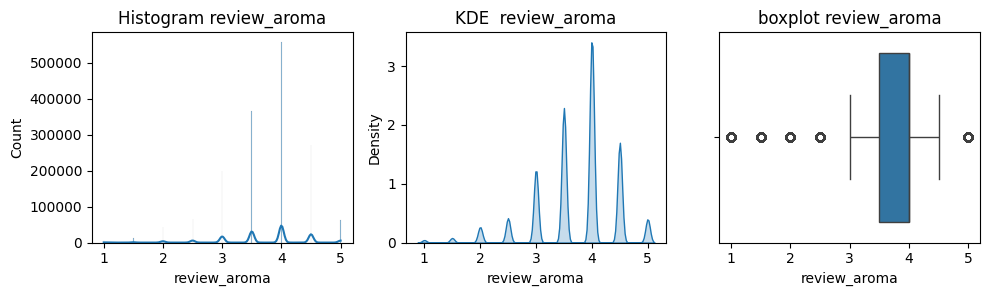

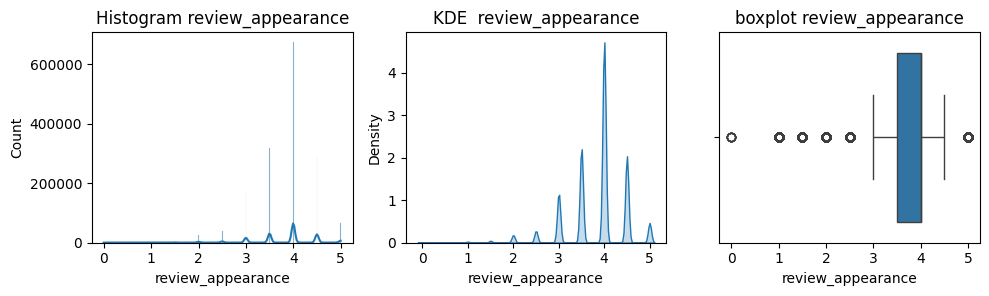

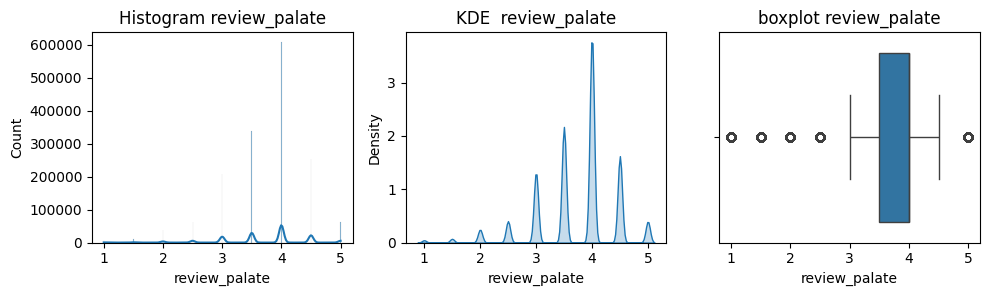

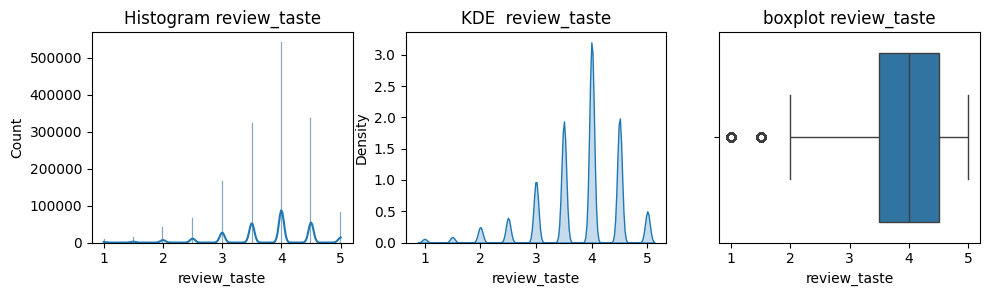

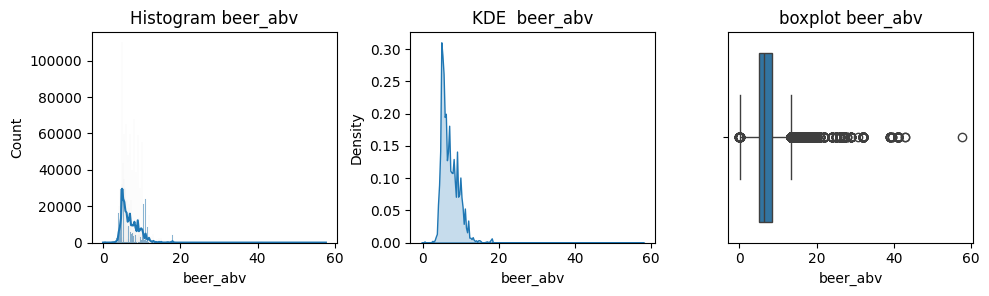

In [8]:
#   Analyser continuous features - reviews
#   ==========================================

for i, col in enumerate(cont_float_feature):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 


Reviews in line with profile and ratings file but more narrowly orgqnized around single ratings while seems more distributed when taking average